#  excersise ---Calculate Bollinger Bands

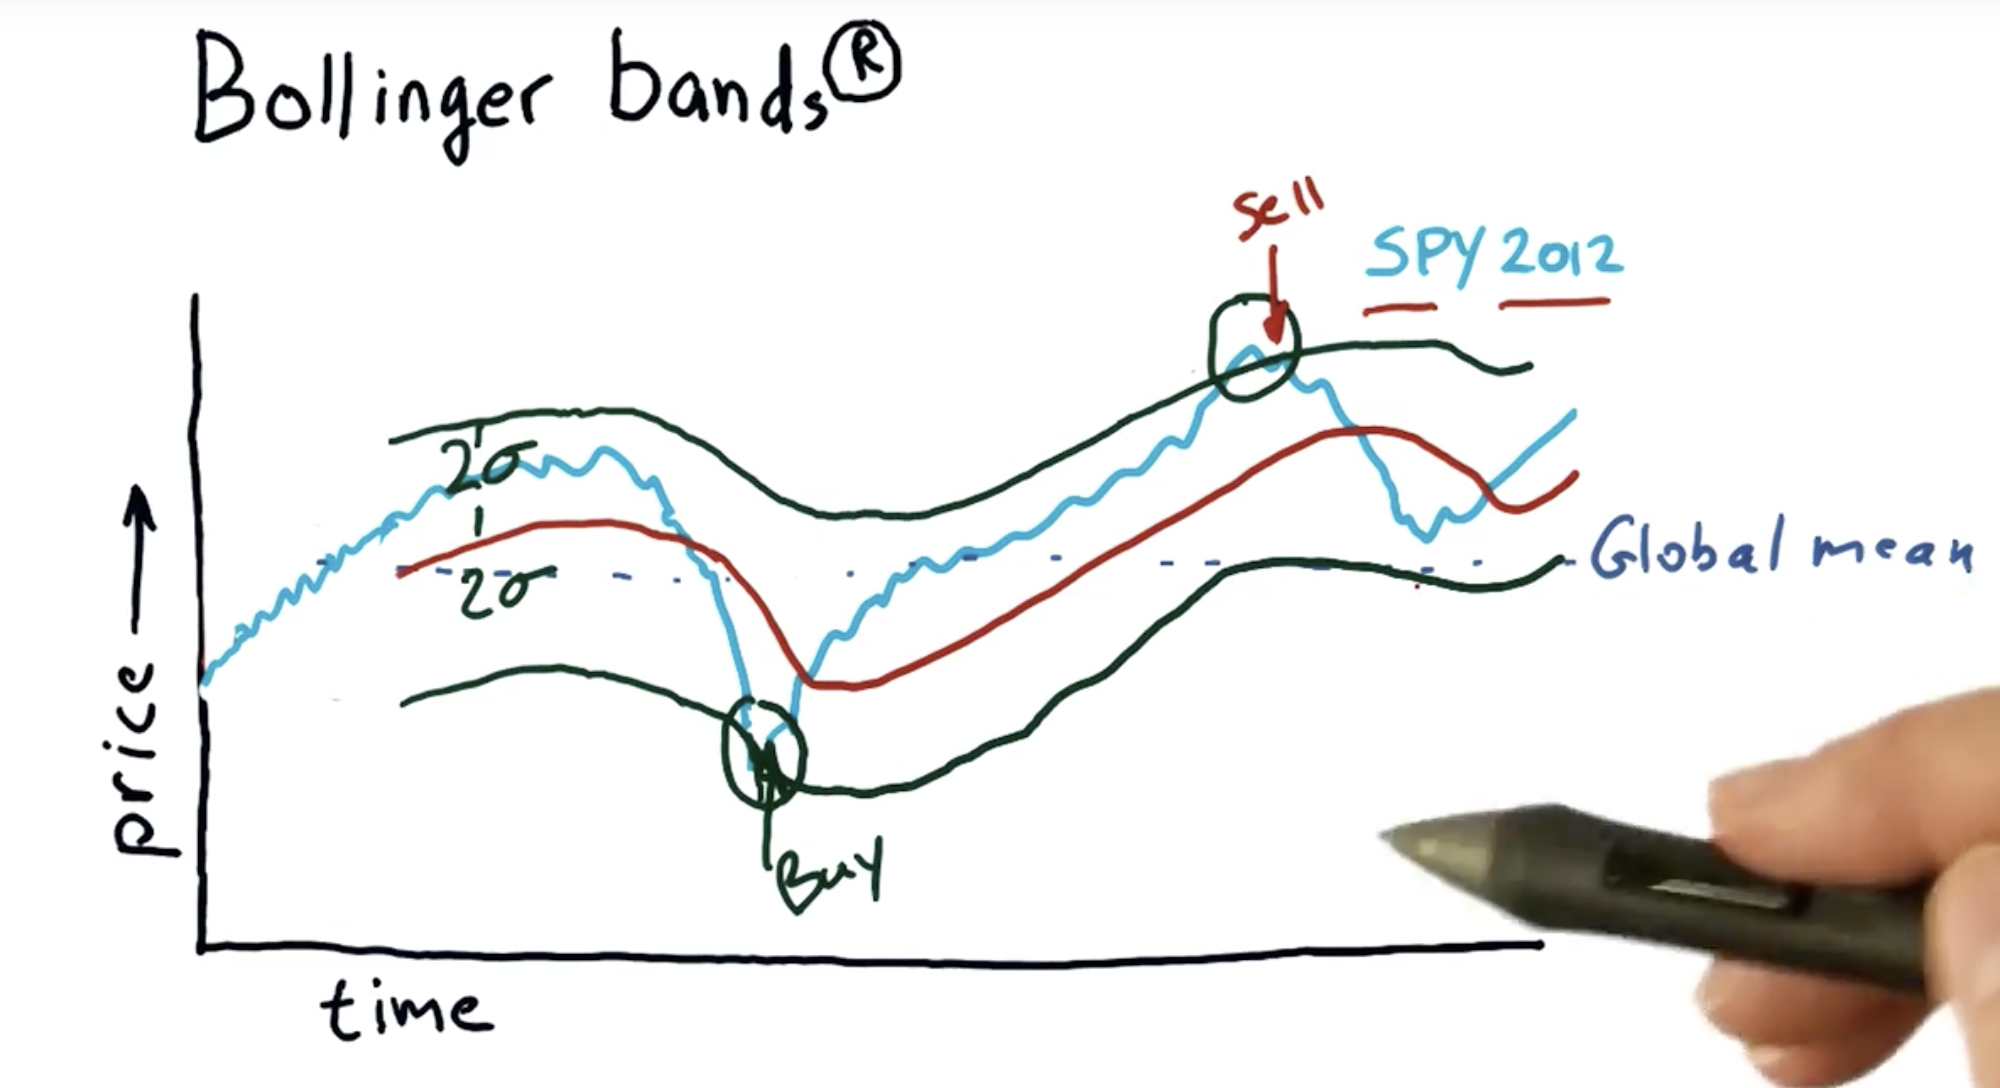

In [1]:
"""Bollinger Bands."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values,window=window)


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band=rm+rstd*2
    lower_band=rm-rstd*2
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    test_run()


FileNotFoundError: File b'data/SPY.csv' does not exist

#  excersice--Daily returns
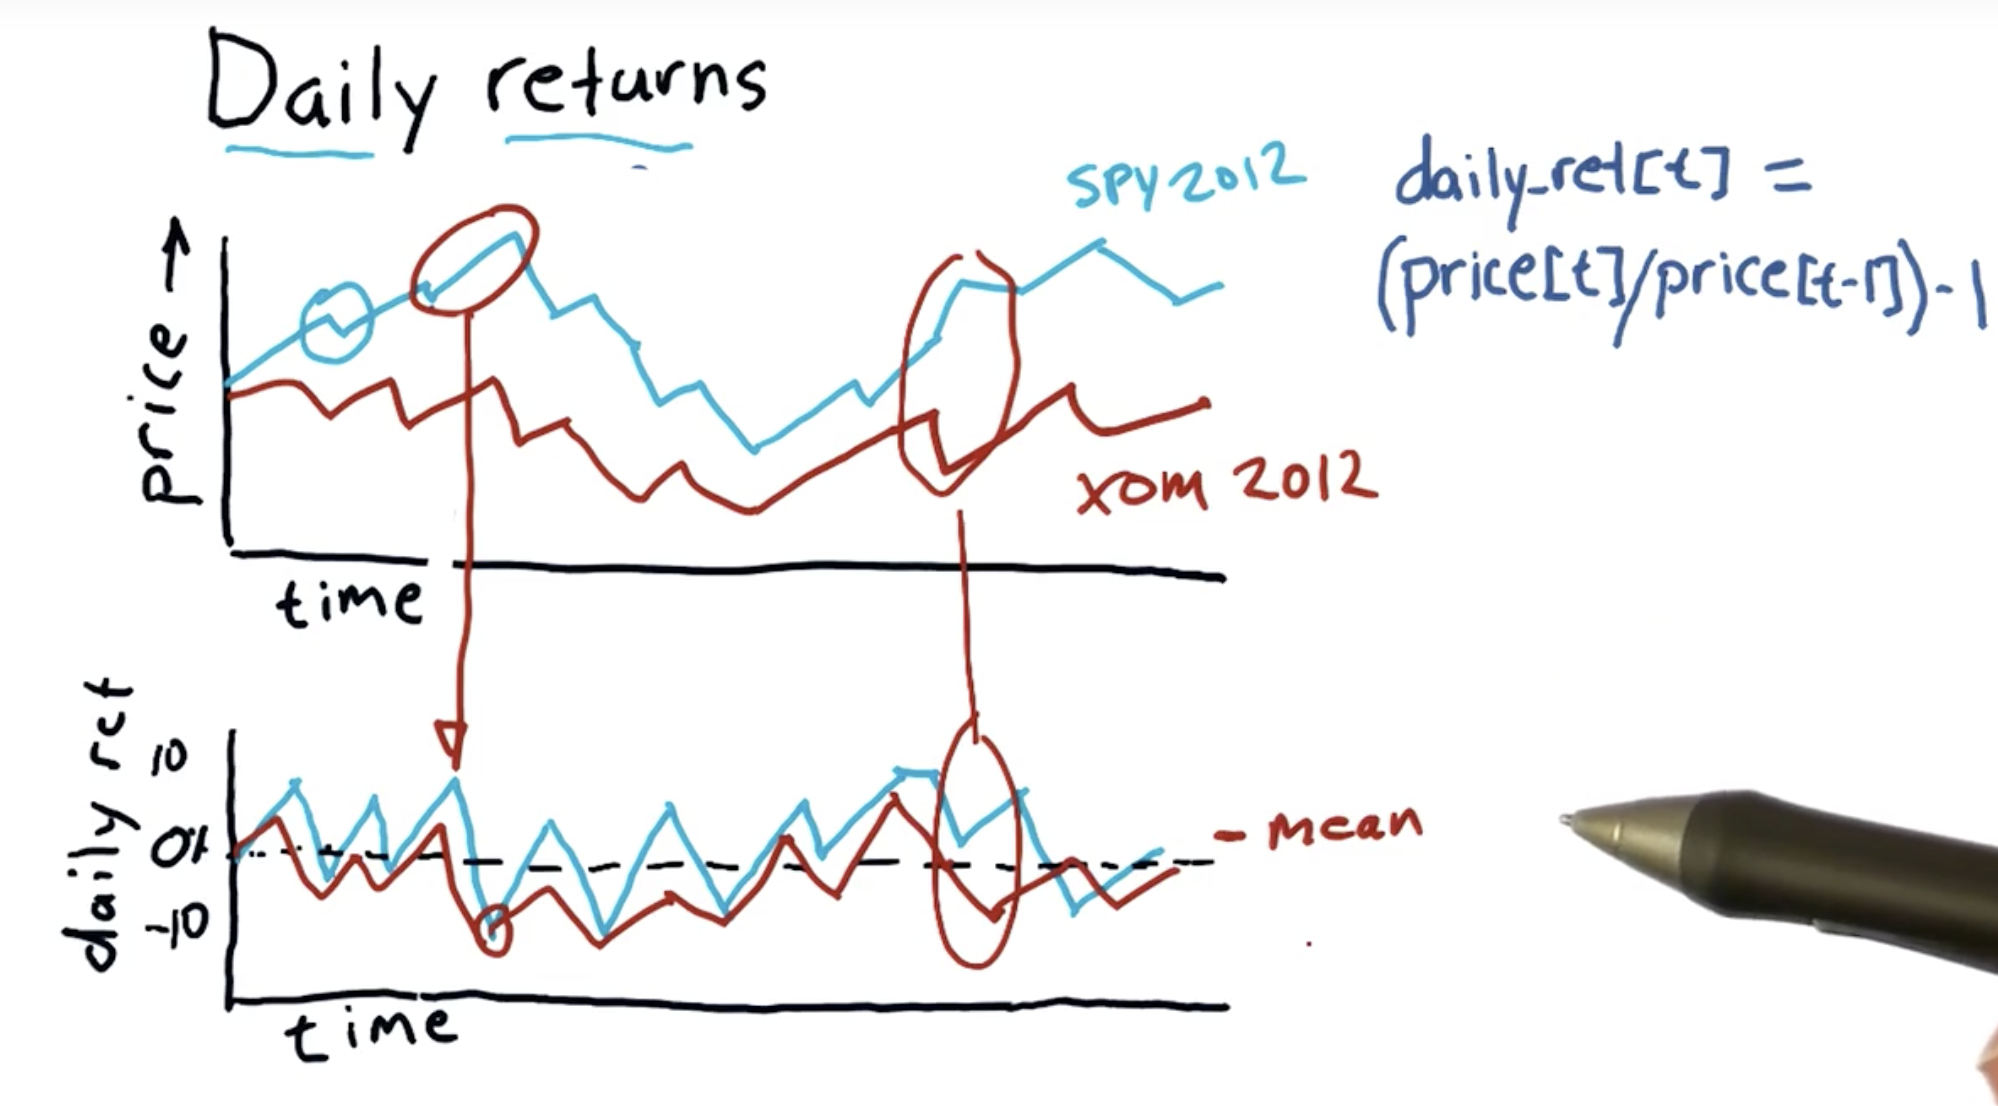

In [2]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns=df.copy() # copy given DataFrame to match size and column names
    #compute daily returns for row 1 onwards
     daily_returns=(df/df.shift(1))-1     #equals= daliy_returns[1:]=(df[1:]/df[:-1].values)-1  不加values的话,会默认按照索引对应计算
    
    daily_returns.ix[0,:]=0 # set daily returns for  row 0 to 0
    return daily_returns

def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()


FileNotFoundError: File b'data/SPY.csv' does not exist

# 累计收益率 Cumulative returns
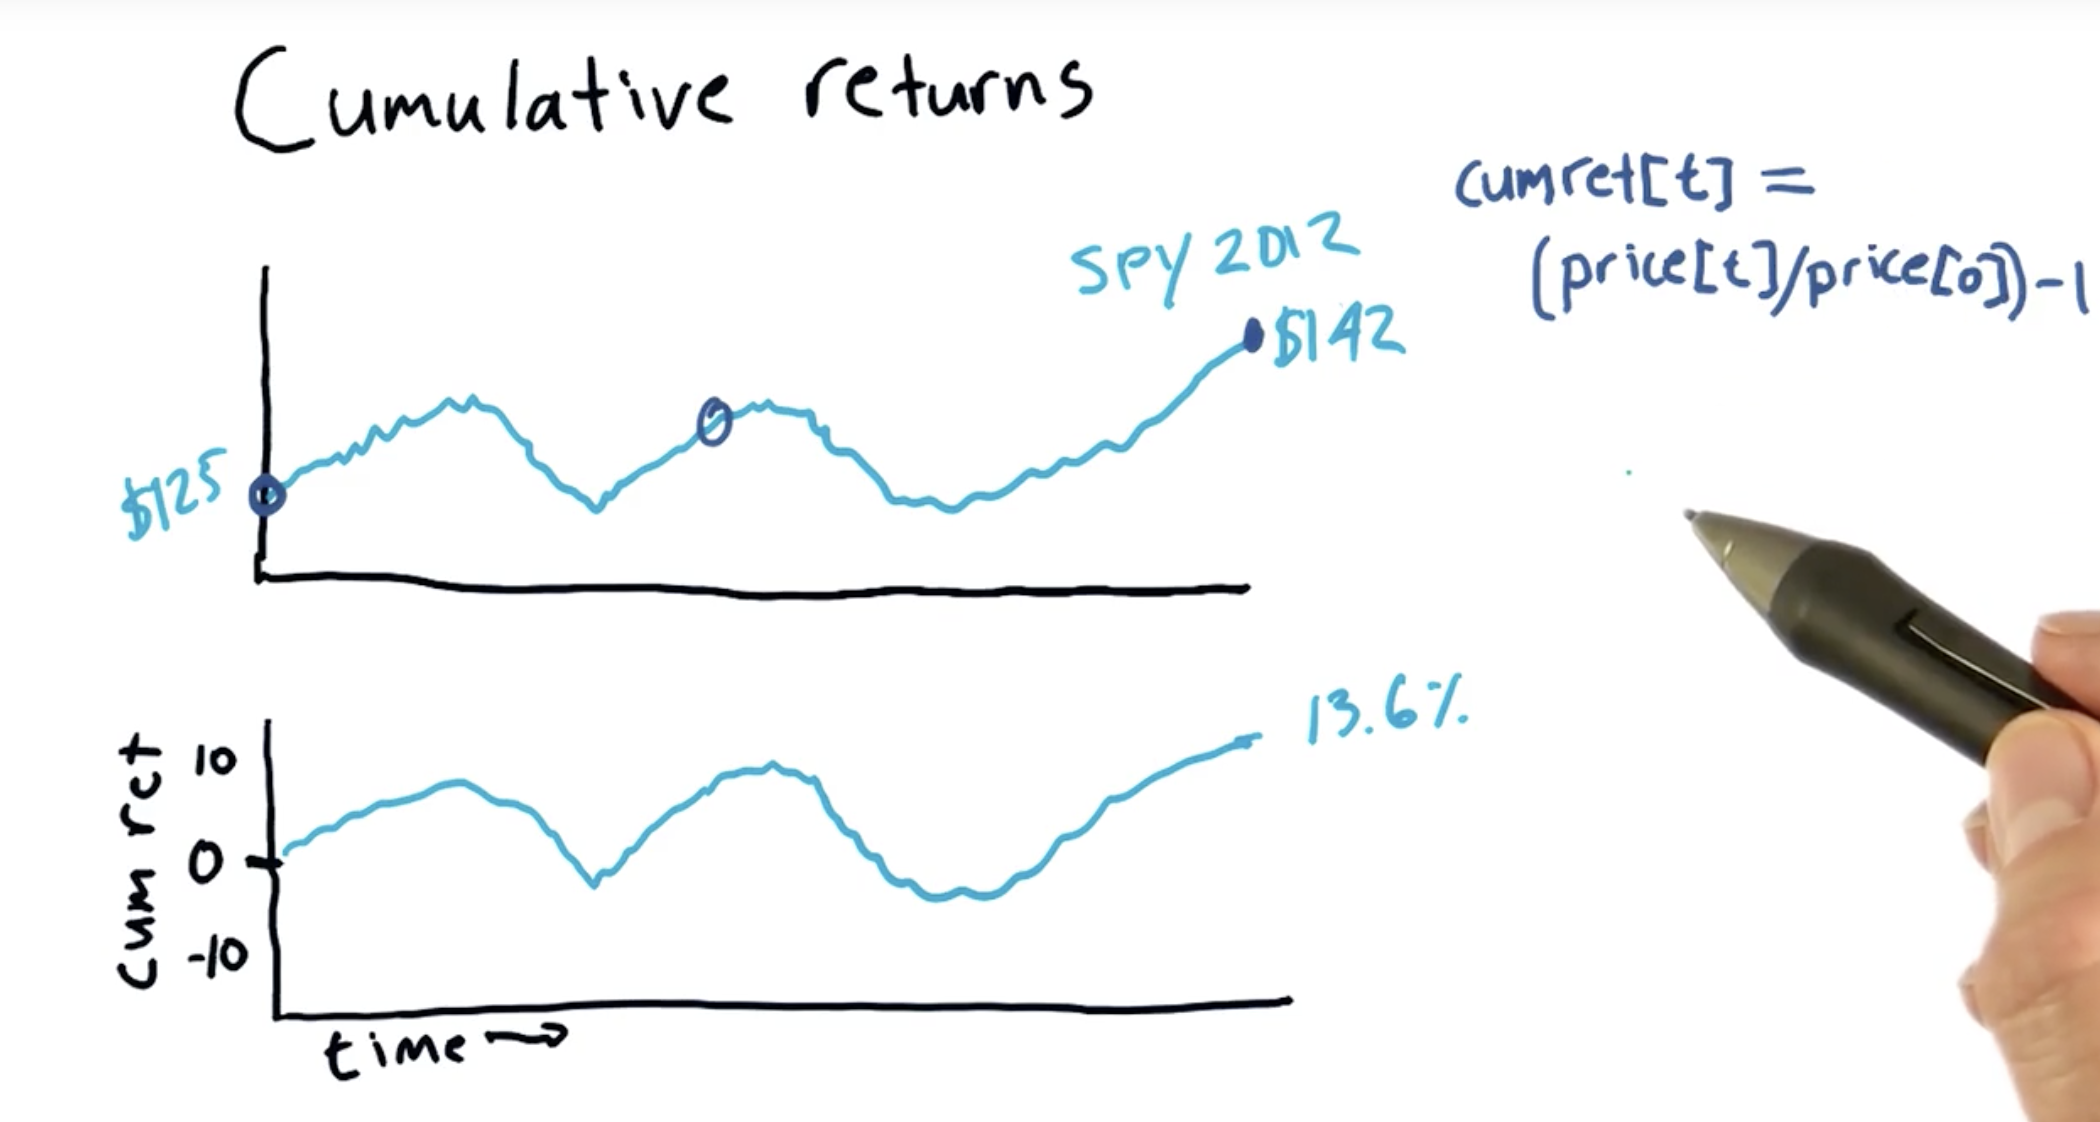

# fill the missing data
- 1、针对中间和末尾的缺失值使用之前的交易数据向前填充 (日期大的为前)
- 2、针对开头的丢失值端,使用后面的交易数据进行向后填充
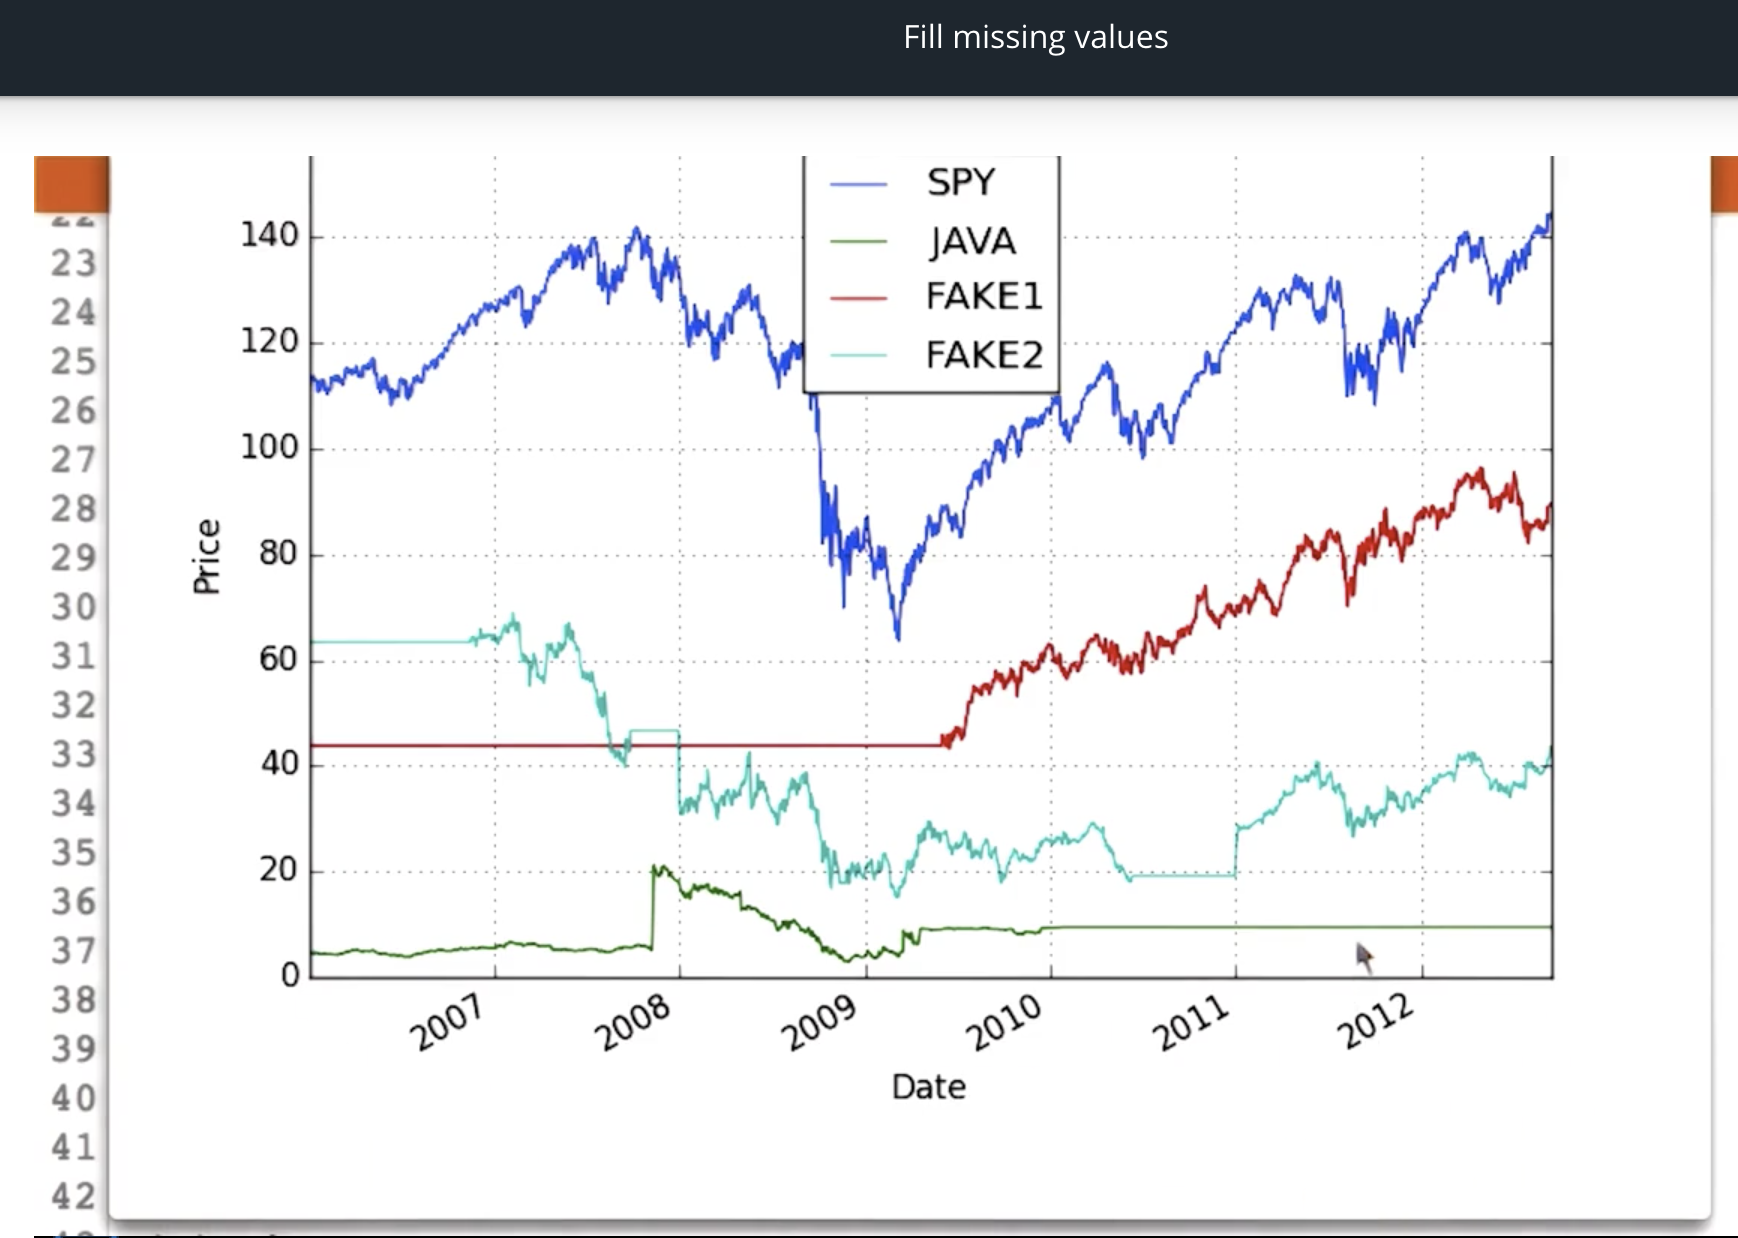
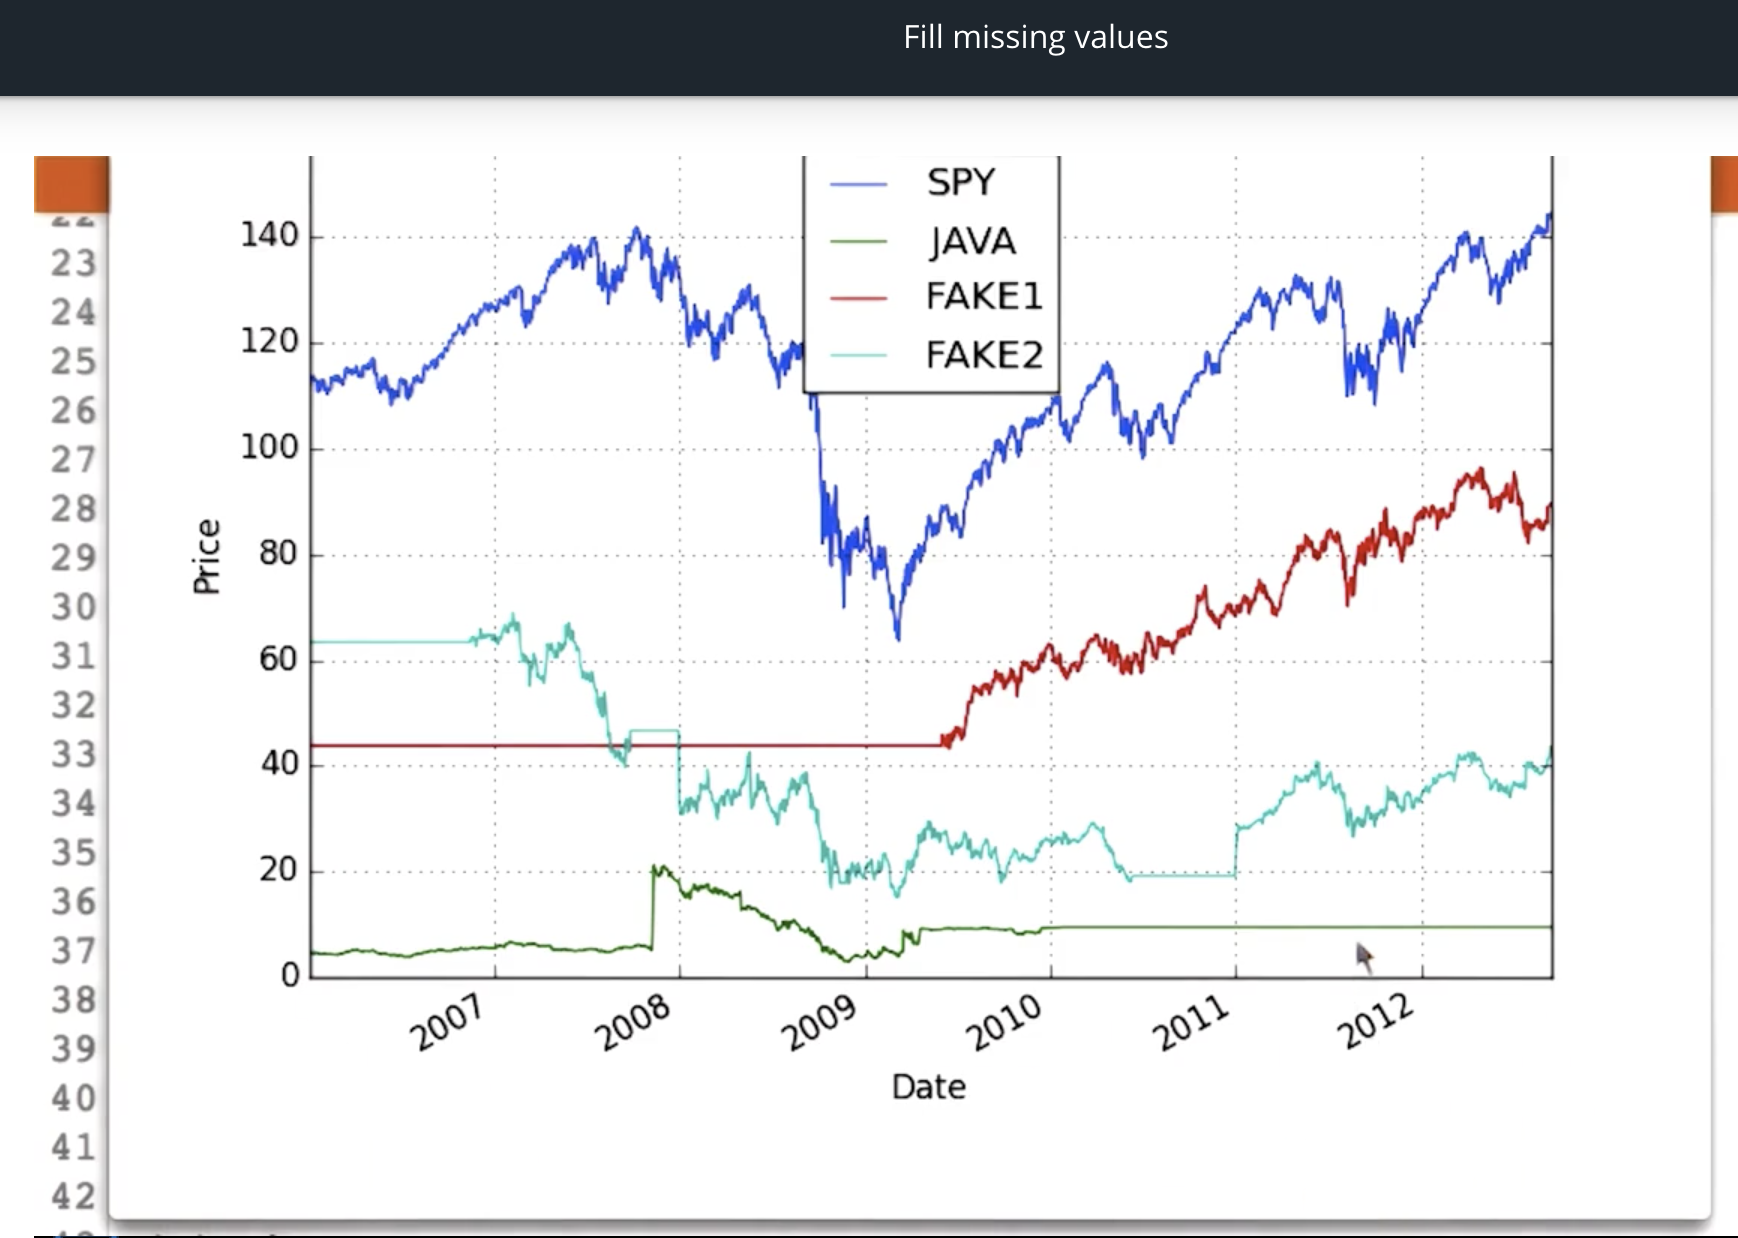


In [5]:
"""Fill missing values"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    ##########################################################
    pass  # TODO: Your code here (DO NOT modify anything else)
    ##########################################################
    df_data.fillna(method='ffill',inplace=True)
    df_data.fillna(method='bfill',inplace=True)
    

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])

    return df_final


def plot_data(df_data):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title="Stock Data", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    """Function called by Test Run."""
    # Read data
    symbol_list = ["JAVA", "FAKE1", "FAKE2"]  # list of symbols
    start_date = "2005-12-31"
    end_date = "2014-12-07"
    dates = pd.date_range(start_date, end_date)  # date range as index
    df_data = get_data(symbol_list, dates)  # get data for each symbol

    # Fill missing values
    fill_missing_values(df_data)

    # Plot
    plot_data(df_data)


if __name__ == "__main__":
    test_run()


FileNotFoundError: File b'data/SPY.csv' does not exist